# <center><u> Exploratory Data Analysis-Cars dataset</u> </center>

## 1. Importing the necessary libraries

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Download the dataset and load into dataframe

In [81]:
df=pd.read_csv("/content/drive/MyDrive/data.csv")


In [82]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 3. Check the datatypes

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

## 4. Dropping irrevalent columns

In [84]:
cols_to_drop=["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"]

In [85]:
df=df.drop(cols_to_drop,axis=1)
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## 5.  Renaming the columns

In [86]:
rename_cols = {"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", 
               "Driven_Wheels": "Drive Mode","highway MPG": "MPG_H", "city mpg": "MPG-C", "MSRP": "Price" }

In [87]:
df=df.rename(columns=rename_cols)

In [88]:
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## 6. Dropping the duplicate rows

In [89]:
df.duplicated().value_counts()


False    10925
True       989
dtype: int64

In [90]:
df=df.drop_duplicates()
df.head()


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [91]:
df.count

<bound method DataFrame.count of           Make       Model  Year     HP  Cylinders Transmission  \
0          BMW  1 Series M  2011  335.0        6.0       MANUAL   
1          BMW    1 Series  2011  300.0        6.0       MANUAL   
2          BMW    1 Series  2011  300.0        6.0       MANUAL   
3          BMW    1 Series  2011  230.0        6.0       MANUAL   
4          BMW    1 Series  2011  230.0        6.0       MANUAL   
...        ...         ...   ...    ...        ...          ...   
11909    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11910    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11911    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11912    Acura         ZDX  2013  300.0        6.0    AUTOMATIC   
11913  Lincoln      Zephyr  2006  221.0        6.0    AUTOMATIC   

              Drive Mode  MPG_H  MPG-C  Price  
0       rear wheel drive     26     19  46135  
1       rear wheel drive     28     19  40650  
2       rear wheel

## 7. Dropping the null or missing values 

In [92]:
df.isnull().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG_H            0
MPG-C            0
Price            0
dtype: int64

In [93]:
df=df.dropna()

In [94]:
df.isnull().sum()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG_H           0
MPG-C           0
Price           0
dtype: int64

In [95]:
df.describe()


,Year,HP,Cylinders,MPG_H,MPG-C,Price
count,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,1.082700e+04
mean,2010.896370,254.553062,5.691604,26.308119,19.327607,4.249325e+04
std,7.029534,109.841537,1.768551,7.504652,6.643567,6.229451e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,173.000000,4.000000,22.000000,16.000000,2.197250e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,3.084500e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,4.330000e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


## 8. Removing outliers


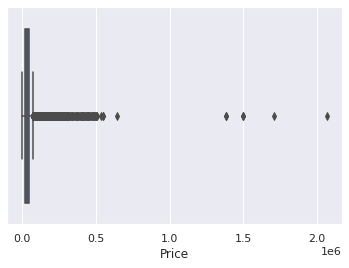

In [96]:
sns.boxplot("Price",data=df)

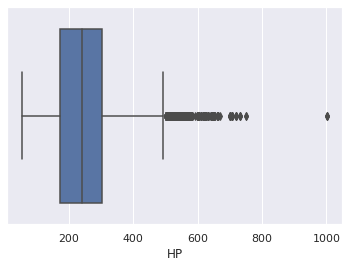

In [97]:
sns.boxplot("HP",data=df)

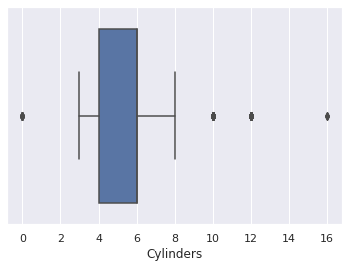

In [98]:
sns.boxplot("Cylinders",data=df)

In [99]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes !="O"]
numerical_features

['Year', 'HP', 'Cylinders', 'MPG_H', 'MPG-C', 'Price']

In [100]:
I=numerical_features

### Outliers removal techniques

1. **Using IQR Technique**
 

In [106]:
for i in I:
 Q1=df[i].quantile(.25)
 Q3=df[i].quantile(.75)
 IQR=Q3-Q1
 lower=(Q1-1.5*IQR)
 upper=(Q3+1.5*IQR)
 print("Outliers for",i,lower,"and",upper)


Outliers for Year 1993.5 and 2029.5
Outliers for HP -22.0 and 498.0
Outliers for Cylinders 1.0 and 9.0
Outliers for MPG_H 10.0 and 42.0
Outliers for MPG-C 7.0 and 31.0
Outliers for Price -10018.75 and 75291.25


**2 Using Z-Scores**

In [107]:
a=df[I].apply(stats.zscore)
print(a)

           Year        HP  Cylinders     MPG_H     MPG-C     Price
0      0.014743  0.732425   0.174386 -0.041059 -0.049314  0.058463
1      0.014743  0.413769   0.174386  0.225455 -0.049314 -0.029591
2      0.014743  0.413769   0.174386  0.225455  0.101214 -0.098621
3      0.014743 -0.223542   0.174386  0.225455 -0.199843 -0.209390
4      0.014743 -0.223542   0.174386  0.225455 -0.199843 -0.128320
...         ...       ...        ...       ...       ...       ...
11909  0.157006  0.413769   0.174386 -0.440829 -0.500900  0.058222
11910  0.157006  0.413769   0.174386 -0.440829 -0.500900  0.227587
11911  0.157006  0.413769   0.174386 -0.440829 -0.500900  0.130463
11912  0.299270  0.413769   0.174386 -0.440829 -0.500900  0.135279
11913 -0.696575 -0.305482   0.174386 -0.041059 -0.350371 -0.216695

[10827 rows x 6 columns]


In [108]:
threshold=3
df3=df[(a<threshold).all(axis=1)]
df3

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


In [109]:
for i in df.columns:
  
  print(df[i].value_counts())

Chevrolet        1043
Ford              798
Toyota            651
Volkswagen        563
Nissan            540
Dodge             513
GMC               475
Honda             429
Cadillac          396
Mazda             392
Mercedes-Benz     340
Suzuki            338
Infiniti          326
BMW               324
Audi              320
Hyundai           254
Acura             246
Volvo             241
Subaru            229
Kia               219
Mitsubishi        202
Lexus             201
Chrysler          185
Buick             184
Pontiac           163
Lincoln           152
Porsche           134
Land Rover        126
Oldsmobile        111
Saab              101
Aston Martin       91
Bentley            74
Ferrari            69
Plymouth           62
Scion              60
FIAT               58
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo          5
Genesis             3
Bugatti   

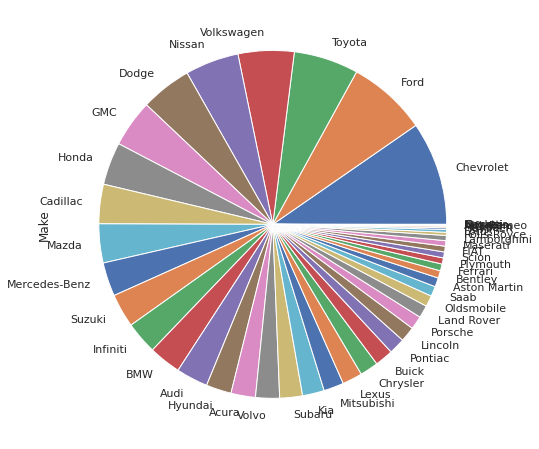

In [110]:
plt.figure(figsize=(8,8))
v=df["Make"].value_counts()
v.plot(kind="pie")
plt.show()


## Visualising Univariate Distributions



### 1 . Histogram & Density Plots

<p style='text-align: right;'> </p>



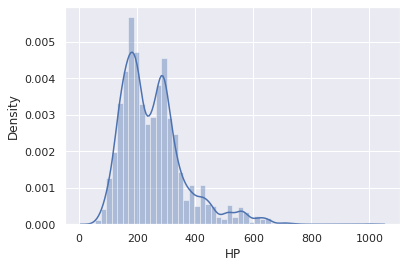

In [111]:
sns.distplot(df["HP"])

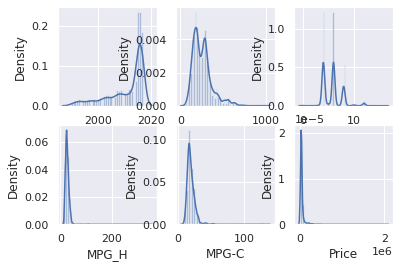

In [112]:
#plot 1:
plt.subplot(2, 3, 1)
sns.distplot(df["Year"])
#plot 2:
plt.subplot(2, 3, 2)
sns.distplot(df["HP"])
#plot 3:
plt.subplot(2, 3, 3)
sns.distplot(df["Cylinders"])
#plot 4:
plt.subplot(2, 3, 4)
sns.distplot(df["MPG_H"])
#plot 5:
plt.subplot(2, 3, 5)
sns.distplot(df["MPG-C"])
#plot 6:
plt.subplot(2, 3, 6)
sns.distplot(df["Price"])
plt.show()




## 2. Bar plots

<p style='text-align: right;'></p>


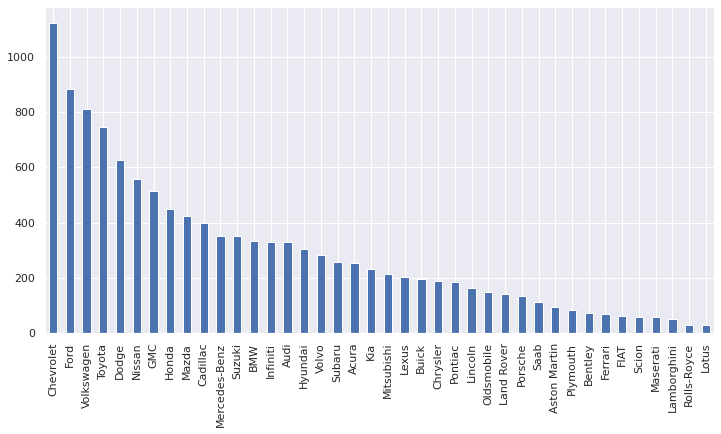

In [73]:
df.Make.value_counts().nlargest(40).plot(kind="bar",figsize=(12,6))
plt.show()


**Chevrolet has highest number of cars.**

### 3. Count Plot



<p style='text-align: right;'> </p>



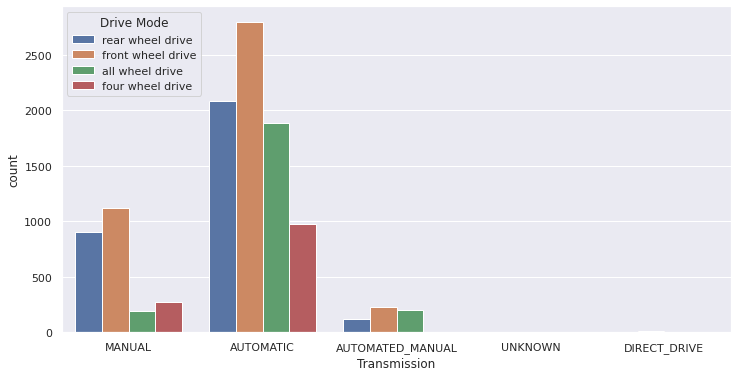

In [114]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Transmission",data=df,hue="Drive Mode")


**Automatic has more count in which front wheel drive mode being at the top.**

# Visualising Bivariate Distributions






## 1. Scatterplots

 <br>
<p style='text-align: right;'> </p>





*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 864x432 with 0 Axes>

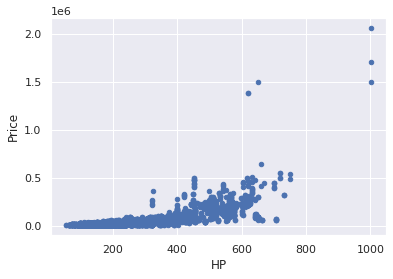

In [115]:
## Your code here - 
plt.figure(figsize=(12, 6))
df.plot(x="HP",y="Price",kind="scatter")

**"HP" and "Price" are positively correlated, as one increases other also increases and vice versa.**

## 2. Lineplot 


<p style='text-align: right;'> </p>






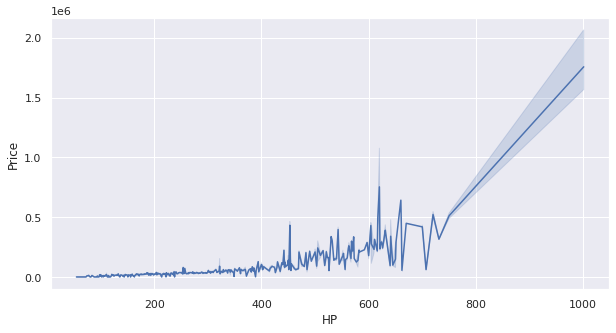

In [70]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="HP",y="Price",data=df)



**Price and hp share a linear trend.**

## 3. Box plot w.r.t various variables

Reference:- https://youtu.be/6MjOlaDyFbc

<p style='text-align: right;'> 20 points</p>


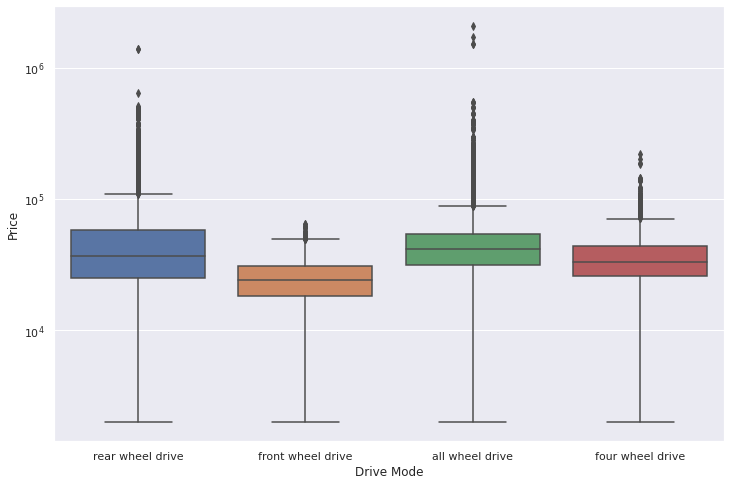

In [66]:
# Plot boxplot of 'Price' across various 'Drive Mode'
plt.figure(figsize=(12, 8))
sns.boxplot(y="Price",x="Drive Mode",data=df)
plt.yscale("log")
plt.show()


**This chart tells you that the Price of front wheel drive, on an average, lower than the other three categories.**



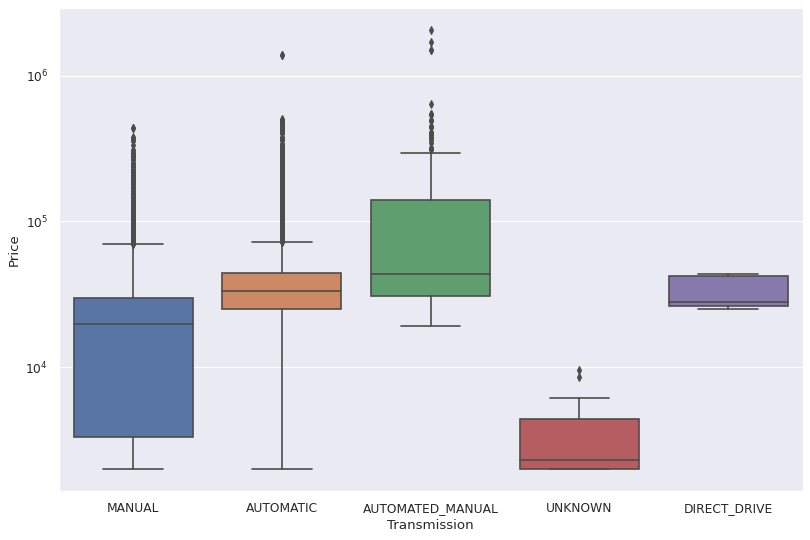

In [67]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(y="Price",x="Transmission",data=df)
plt.yscale("log")
plt.show()


**Automated_manual has highest price amongst all.**

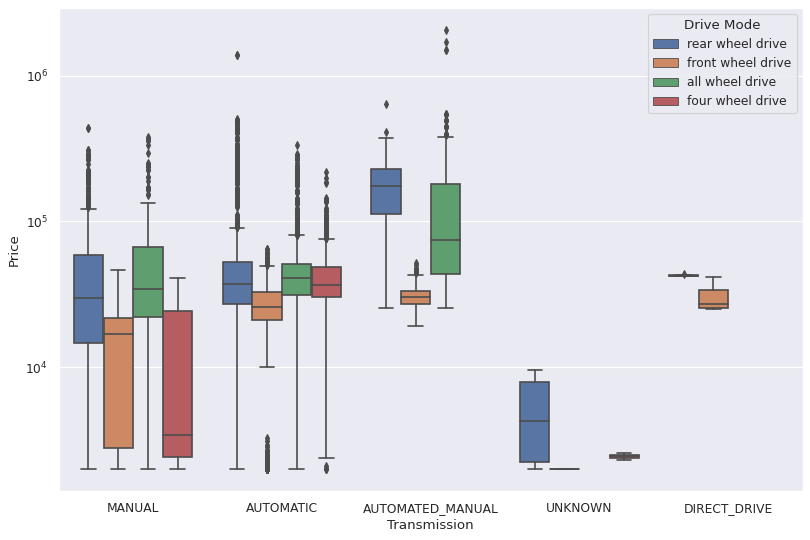

In [59]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="Transmission",y="Price",hue="Drive Mode",data=df)
plt.yscale("log")
plt.show()


**For manual transmission front and four wheel drive mode is cheapest compared to other two drive mode.
Similarly, we can see for other modes**

## 4. Joint distributions


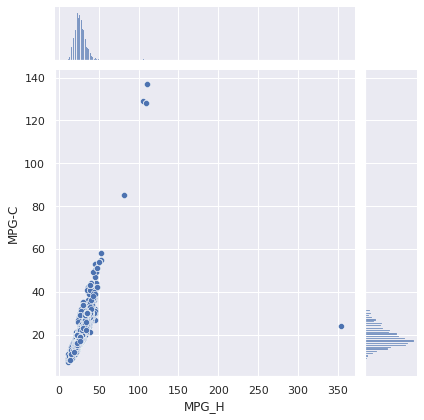

In [116]:
sns.jointplot(x="MPG_H",y="MPG-C",data=df)


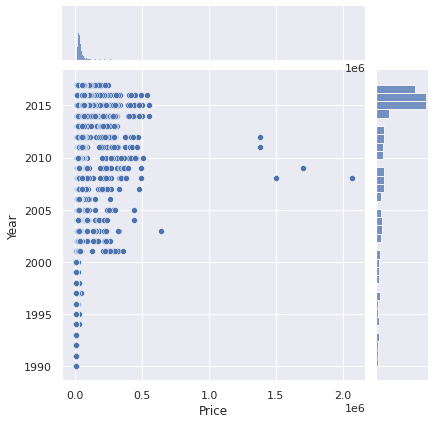

In [ ]:
sns.jointplot(x="Price",y="Year",data=df)


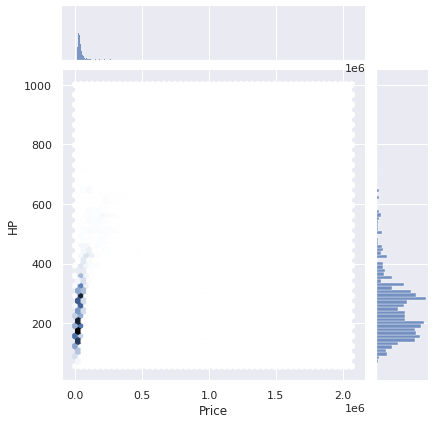

In [ ]:
sns.jointplot(x="Price",y="HP",data=df,kind="hex")


## 5. Plotting Aggregated Values across Categories

### Bar Plots - Mean, Median and Count Plots

<p style='text-align: right;'> </p>




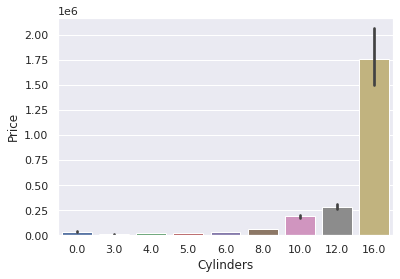

In [ ]:
sns.barplot(x="Cylinders",y="Price",data=df)


**More number of cylinders means more price. **

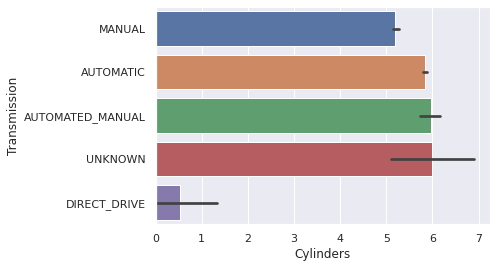

In [ ]:
sns.barplot(x="Cylinders",y="Transmission",data=df)


**For direct drive transmission, cylinders are less.**

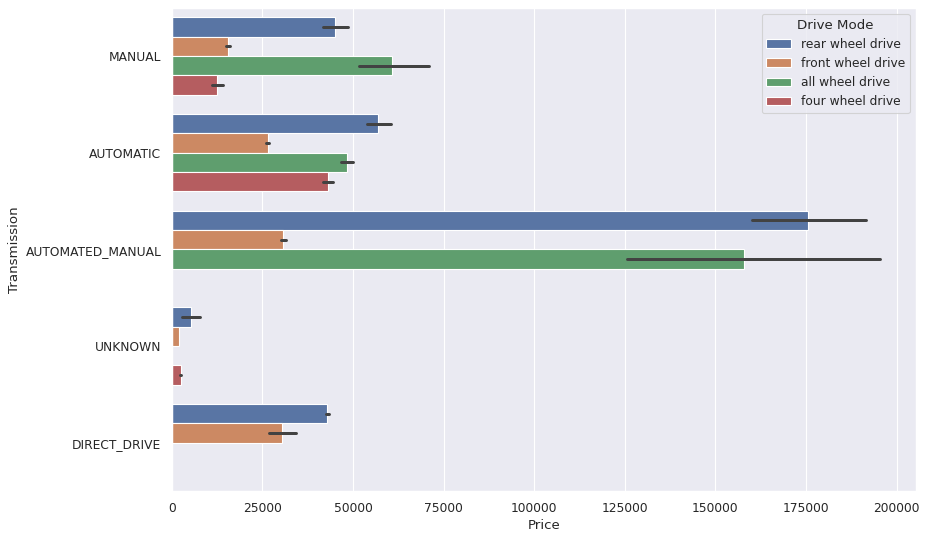

In [ ]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x="Price",y="Transmission",data=df,hue="Drive Mode")



**Automated_manual is costliest.**

# Multivariate Plots



# 1. Pairplot




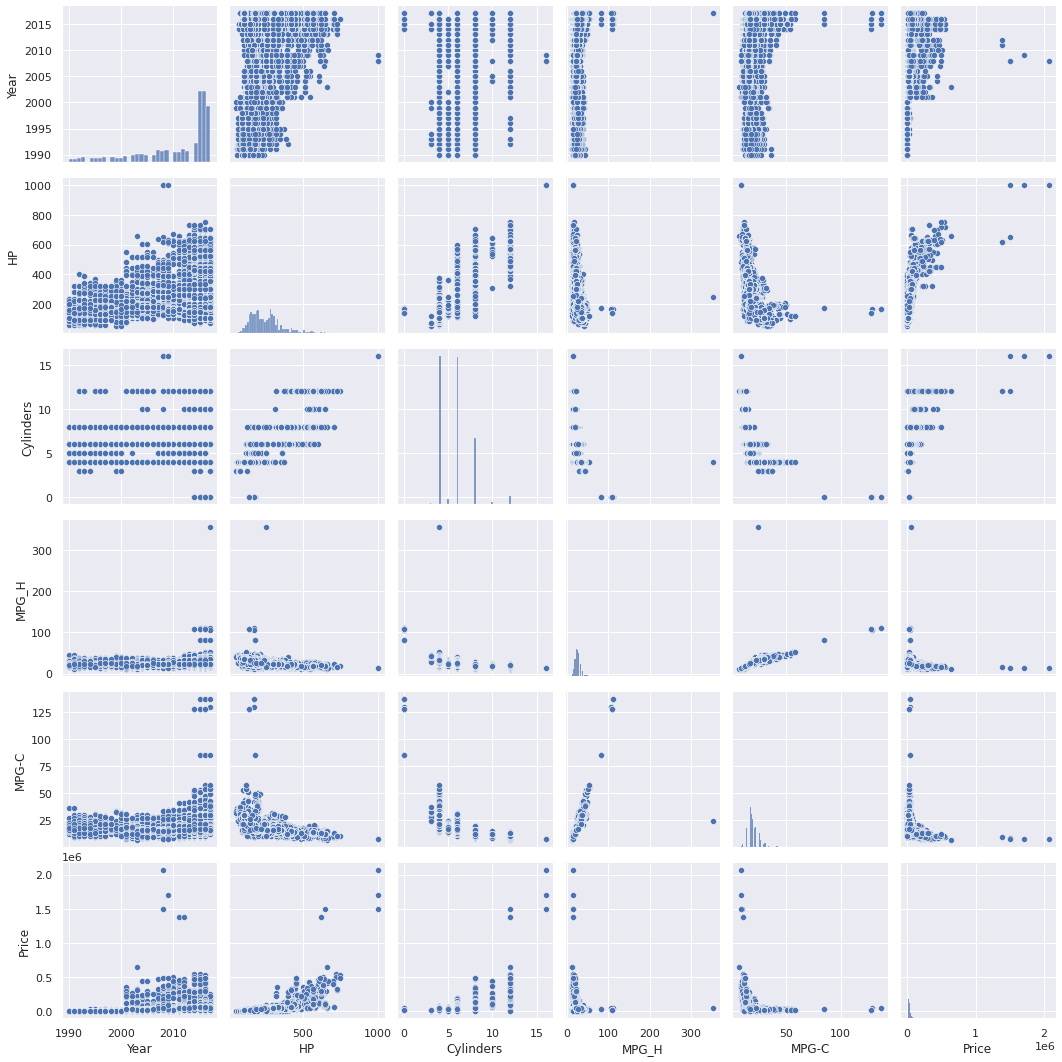

In [ ]:
sns.pairplot(df)

## 2. Multivariate scatter plots



<Figure size 1080x360 with 0 Axes>

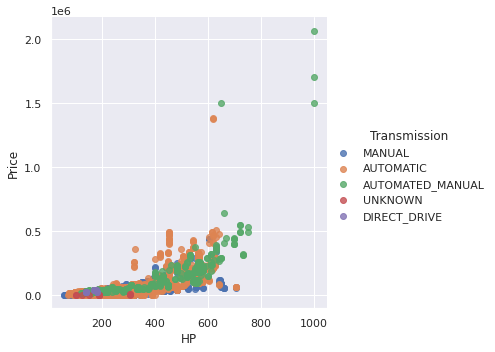

In [ ]:
plt.figure(figsize=(15,5))

sns.lmplot(x = "HP", y = "Price", hue="Transmission" ,data = df,fit_reg=False)
plt.show()



**We can clearly see in above output that the cost price increases for automated_manual transmission cars gradually.**

## 3. Parallel Coordinates




In [55]:
l1=I

print(l1)

['Year', 'HP', 'Cylinders', 'MPG_H', 'MPG-C', 'Price']


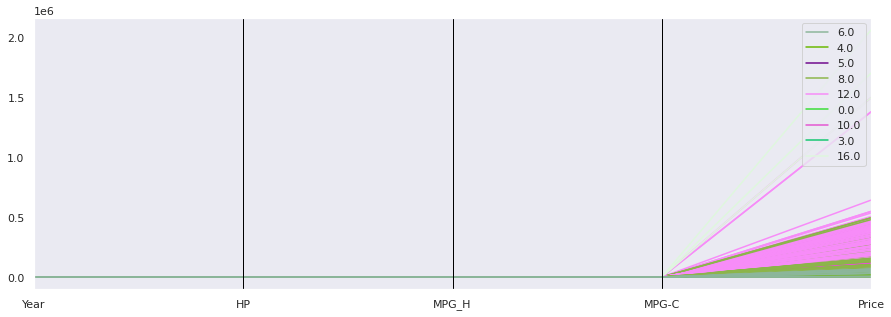

In [56]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,5))
d=df[l1]


parallel_coordinates(d,"Cylinders")


From the above plot we can see that mostly Cylinder 4 is majorly spread in MPG_H and MPG_C. HP variable shows some growth w.r.t year and goes constant for MPG_H and MPG-C.



## 4.  Heatmaps



In [53]:
df.corr()

,Year,HP,Cylinders,MPG_H,MPG-C,Price
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
MPG_H,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
MPG-C,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
Price,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


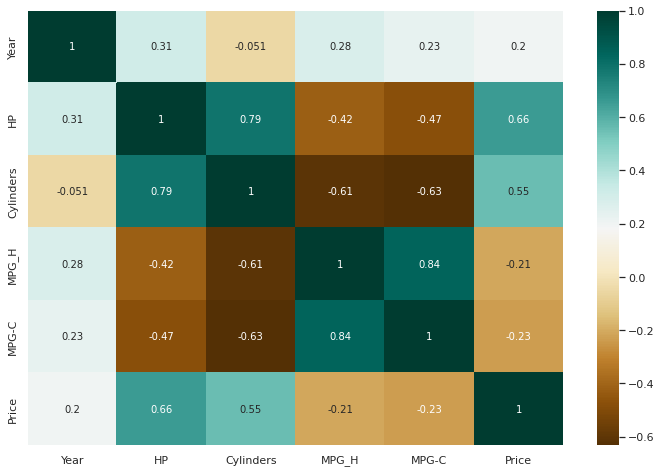

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap = 'BrBG', annot = True)
plt.show()


 The above heatmap plot shows correlation between various variables in the colored scale of -1 to 1.

-----------------------------------